<h1>Summary</h1>

決定木は事前枝刈りパラメータ（max_depth, max_leaf_nodes, min_samples_leaf）によりモデルの複雑さを制御する<br>
決定木は、結果のモデルがデータのスケールに対して完全に不変であることから、特徴量の正規化や標準化は必要ない<br>
sklearnは、二分木しか作らないCARTアルゴリズムを使っており、葉ノード以外のノードには、必ず二つの子ノードがある。（ID3などのほかのアルゴリズムは、決定木のなかに三つ以上の子があるノードを作ることができる）<br>
決定木の決定境界は直交するものになるため、訓練セットの回転によって結果が大きく変わる。この問題は、訓練データをよりよい向きに変えられることが多いPCAを使えば、ある程度軽減できる<br>
決定木は、事前枝刈りを行ったとしても過剰適合しやすく、凡化性能が低い傾向があるため、アンサンブル法を用いるとよい

<h3>分類タスクについて</h3>
各ノードのgini属性はノードの不純度（impurity）を示す（ジニ係数）。ノードの条件に当てはまるすべての訓練インスタンスが同じクラスに属するなら、そのノードは「純粋」（gini = 0）である。不純度の指標として、デフォルトではジニ不純度が使われるが、エントロピーも使える。集合が1つのクラスに属するインスタンス（要素）だけから構成されている場合、集合のエントロピーは0である<br>
kを特徴量、$t_k$を閾値（例えば、花弁の長さ<=2.45cm）として、CARTアルゴリズムは下記の分類用損失関数$J(k, t_k)$が最小となるような$(k, t_k)$のペアを探す。それをサブセットにも適用していき、再帰的に分割していく。深さの上限（max_depth）に達するか、不純度を下げる分割方法が見つからなければ再帰を中止する。停止条件はその他のハイパーパラメータ（min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes
）の影響も受ける<br>

ジニ係数 $G_i=1-\sum_{k=1}^{n}{p_{i,k}}^2$<br>
エントロピー $H_i=-\sum_{k=1\\p_{i,k}\neq0}^{n}{p_{i,k}}log_2 ({p_{i,k}})$<br>
$p_{i,k}$は、i番目のノードの訓練インスタンス数のなかのクラスkのインスタンスの割合<br>

CARTの分類用損失関数 $J(k, t_k)=\frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$<br>
$G_{left/right}$は、左右のサブセットの不純度、$m_{left/right}$は、左右のサブセットのインスタンス数

<h3>回帰タスクについて</h3>
回帰タスクにおける決定木のデータポイントの出力は、その葉の中にある訓練データポイントの平均値となる<br>
すべての決定木による回帰モデルは外挿ができない、つまり訓練データのレンジの外側に対しては予測ができない<br>
CARTアルゴリズムは、分類のときとほとんど同じように機能している。ただ、不純度ではなくMSEが最小になるように訓練セットを分割しているところだけが異なる<br>

CARTの回帰用損失関数 $J(k, t_k)=\frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$<br>
$MSE_{node}=\sum_{i\in{node}}(\hat{y}_{node} - y^{(i)})^2$<br>
$\hat{y}_{node}=\frac{1}{m_{node}}\sum_{i\in{node}}y^{(i)}$

<h4>重要なパラメータ</h4>
事前枝刈りパラメータ<br>
max_depth⇒木の深さ<br>
min_samples_split⇒ノードを分割するために必要なサンプル数の下限<br>
max_leaf_nodes⇒葉っぱの数<br>
min_samples_leaf⇒1枚の葉っぱに属する最小データ数（=1がデフォルトで「分けられるだけ分ける」）<br>
min_weight_fraction_leaf⇒min_samples_leafと同じだが、重み付きインスタンスの総数に対する割合で表現される<br>
max_features⇒各ノードで分割のために評価される特徴量数の上限

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import os
import mglearn

<h1>Classification</h1>

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0).fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [6]:
tree_predict = np.argmax(tree.predict_proba(X_test), axis = 1)
print(tree_predict)
np.all(tree_predict == tree.predict(X_test))

[1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]


True

In [7]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree,
                out_file = "tree.dot",
                class_names = cancer.target_names,
                feature_names = cancer.feature_names,
                impurity = True,
                filled = True
               )

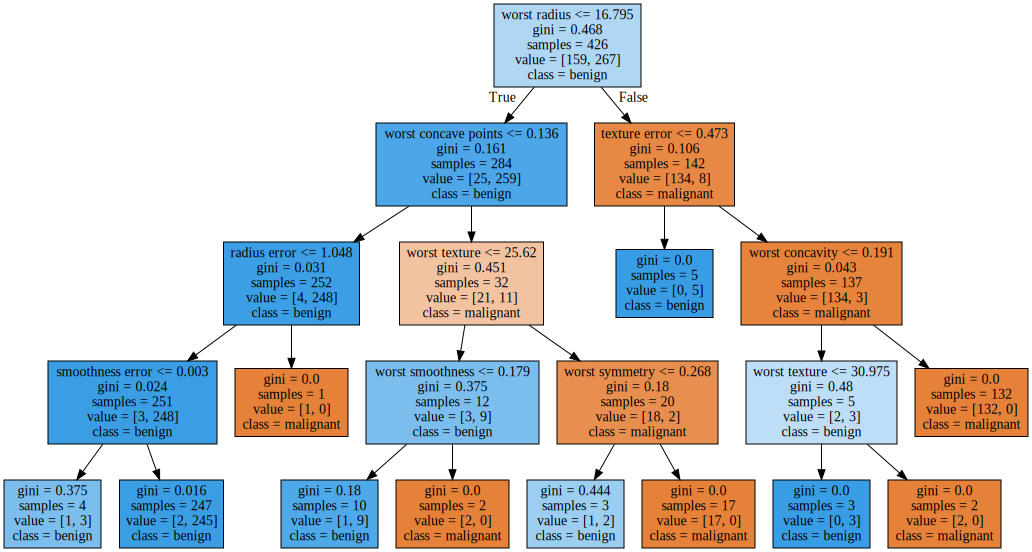

In [8]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
# 特徴量の重要度
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [10]:
def plot_feature_importances(model, n_features, feature_names):
    plt.figure(figsize = (16, 8))
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

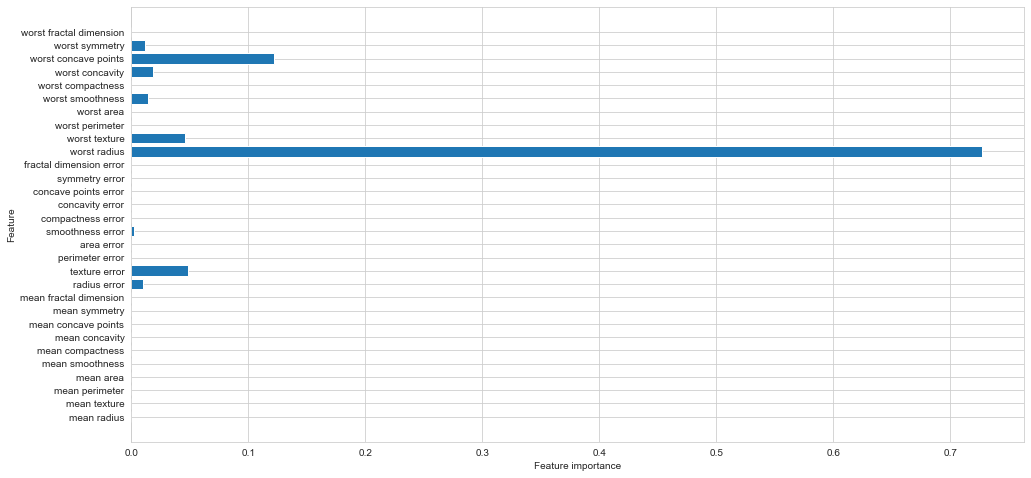

In [11]:
plot_feature_importances(tree, cancer.data.shape[1], cancer.feature_names)

<h1>Regression</h1>

In [12]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0, 0.5, 'Price in $/Mbyte')

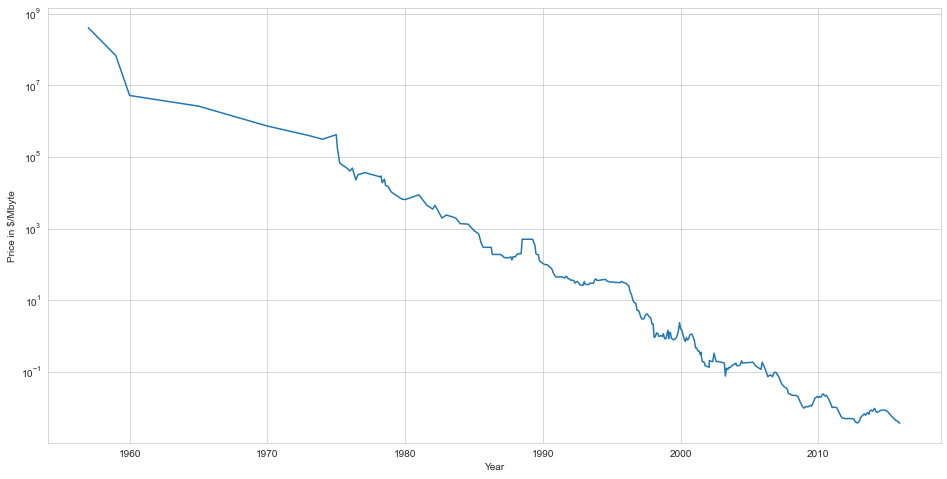

In [13]:
plt.figure(figsize = (16, 8))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte") # y軸は対数スケール

In [14]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = np.array(data_train.date).reshape(len(data_train), 1)
y_train = np.log(data_train.price)
X_all = np.array(ram_prices.date).reshape(len(ram_prices), 1)

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
pred_tree = tree.predict(X_all)
price_tree = np.exp(pred_tree)

In [16]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)
pred_lr = linear_reg.predict(X_all)
price_lr = np.exp(pred_lr)

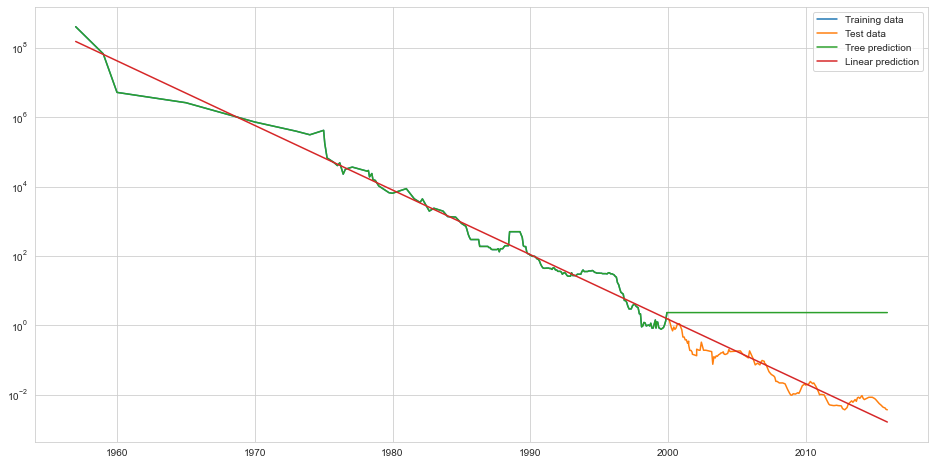

In [17]:
plt.figure(figsize = (16, 8))
plt.semilogy(data_train.date, data_train.price, label = "Training data")
plt.semilogy(data_test.date, data_test.price, label = "Test data")
plt.semilogy(ram_prices.date, price_tree, label = "Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label = "Linear prediction")
plt.legend()